# LFM Pulse Ambiguity Function

Referring to Section 8.6.2, the complex envelope of an LFM pulse is written as (Equation 8.65)

\begin{equation}\label{eq:single_lfm_pulse}
    s(t) = \text{rect}\bigg[ \frac{t}{\tau_p} \bigg]\, e^{j \pi \beta t^2}.
\end{equation}

Using (Equation 8.65) and (Equation.53), the ambiguity function is written as (Equation 8.66)

\begin{equation}
    \big| \chi(\tau, f) \big|^2  = \Bigg| \int\limits_{-\infty}^{\infty} \text{rect}\bigg[ \frac{t}{\tau_p}\bigg] \, \text{rect}\bigg[ \frac{t - \tau}{\tau_p} \bigg] e^{j \pi \beta t^2}\, e^{-j \pi \beta (t - \tau)^2}\, e^{j 2 \pi f t}\, dt\Bigg|^2.
\end{equation}

Performing the integration leads to (Equation 8.67)

\begin{equation}
    \big| \chi(\tau, f) \big|^2  = \Big| (\tau_p - |\tau|) \, \text{sinc}\big[ \tau_p (f + \beta \tau) (\tau_p - |\tau|) \big] \Big|^2 \quad \text{for  } 0 \le |\tau| \le \tau_p.
\end{equation}

Begin by getting the library path

In [12]:
import lib_path

Set the pulsewidth (s) and the bandwidth (Hz)

In [13]:
pulsewidth = 1e-3

bandwidth = 2e3

Generate the time delay (s) using the `linspace` routine from `scipy`

In [14]:
from scipy import linspace


# Set the time delay

time_delay = linspace(-pulsewidth, pulsewidth, 5000)

Calculate the ambiguity function for the LFM pulse

In [15]:
from Libs.ambiguity.ambiguity_function import lfm_pulse

from scipy import finfo


ambiguity = lfm_pulse(time_delay, finfo(float).eps, pulsewidth, bandwidth)

Plot the zero-Doppler cut using the `matplotlib` routines

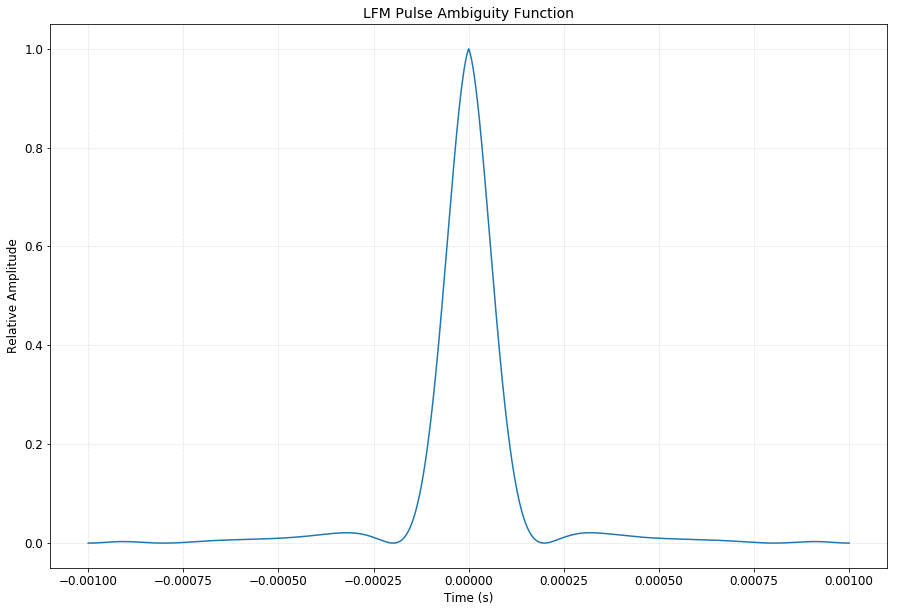

In [16]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Plot the ambiguity function

plt.plot(time_delay, ambiguity, '')



# Set the x and y axis labels

plt.xlabel("Time (s)", size=12)

plt.ylabel("Relative Amplitude", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Set the plot title and labels

plt.title('LFM Pulse Ambiguity Function', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)

Set the Doppler mismatch frequencies using the `linspace` routine

In [17]:
doppler_frequency = linspace(-bandwidth, bandwidth, 5000)

Calculate the ambiguity function for the LFM pulse

In [18]:
ambiguity = lfm_pulse(finfo(float).eps, doppler_frequency, pulsewidth, bandwidth)

Display the zero-range cut for the LFM pulse

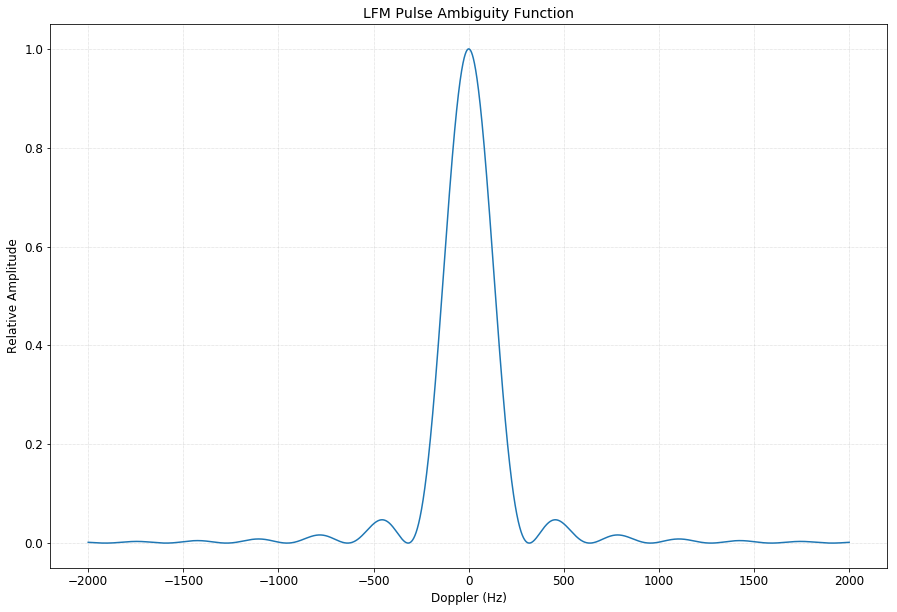

In [19]:
plt.plot(doppler_frequency, ambiguity, '')


# Set the x and y axis labels

plt.xlabel("Doppler (Hz)", size=12)

plt.ylabel("Relative Amplitude", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Set the plot title and labels

plt.title('LFM Pulse Ambiguity Function', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)

Set the time delay and Doppler mismatch frequency and create the two-dimensional grid using the `meshgrid` routine from `scipy`

In [20]:
from scipy import meshgrid


# Set the time delay

time_delay = linspace(-pulsewidth, pulsewidth, 500)



# Set the Doppler mismatch

doppler_frequency = linspace(-bandwidth, bandwidth, 500)



# Create the grid

t, f = meshgrid(time_delay, doppler_frequency)

Calculate the ambiguity function for the LFM pulse

In [21]:
ambiguity = lfm_pulse(t, f, pulsewidth, bandwidth)

Display the two-dimensional contour plot for the LFM pulse ambiguity function

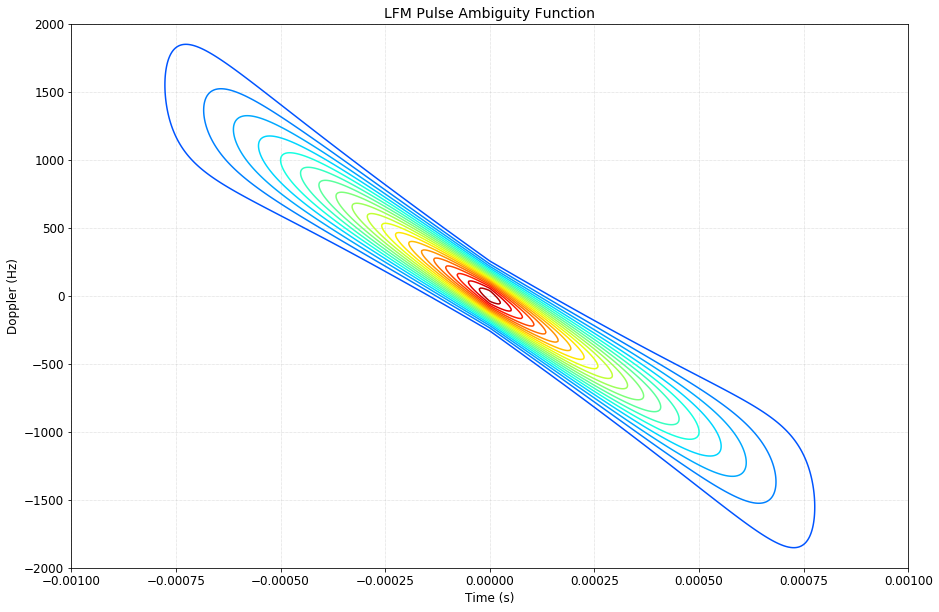

In [22]:
# Plot the ambiguity function

plt.contour(t, f, ambiguity, 20, cmap='jet', vmin=-0.2, vmax=1.0)


# Set the x and y axis labels

plt.xlabel("Time (s)", size=12)

plt.ylabel("Doppler (Hz)", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Set the plot title and labels

plt.title('LFM Pulse Ambiguity Function', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)